In [12]:
# 🚀 Auto-setup: installs deps + configures CFBD access
%run ./_auto_setup.py


🔧 Notebook auto-setup complete:
  • Project root: /Users/stephen_bowman/Documents/GitHub/Script_Ohio_2.0/starter_pack
  • Requirements: /Users/stephen_bowman/Documents/GitHub/Script_Ohio_2.0/starter_pack/requirements.txt
  • Missing modules: none
  • Auto install performed: False


In [13]:
# 03_metrics_comparison.ipynb
# 📊 Comparing Team Efficiency Metrics

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path

# Import starter pack configuration system
_config_dir = Path().resolve() / "config"
if str(_config_dir.parent) not in sys.path:
    sys.path.insert(0, str(_config_dir.parent))
from config.data_config import get_starter_pack_config

# Get configuration
config = get_starter_pack_config()
current_year = config.current_year
DATA_DIR = str(config.data_dir)

# Configure plots
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]


In [14]:
# 📂 Load team-level advanced season stats for a recent year

stats_path = os.path.join(DATA_DIR, "advanced_season_stats", f"{current_year}.csv")
stats = pd.read_csv(stats_path)

# Filter to FBS teams
teams = stats[stats['conference'].notnull()].copy()

# Drop rows with missing metric values
teams = teams.dropna(subset=[
    'offense_ppa', 'offense_successRate', 'offense_explosiveness',
    'defense_ppa', 'defense_successRate', 'defense_explosiveness'
])

print(f"{len(teams)} teams with complete data")


136 teams with complete data


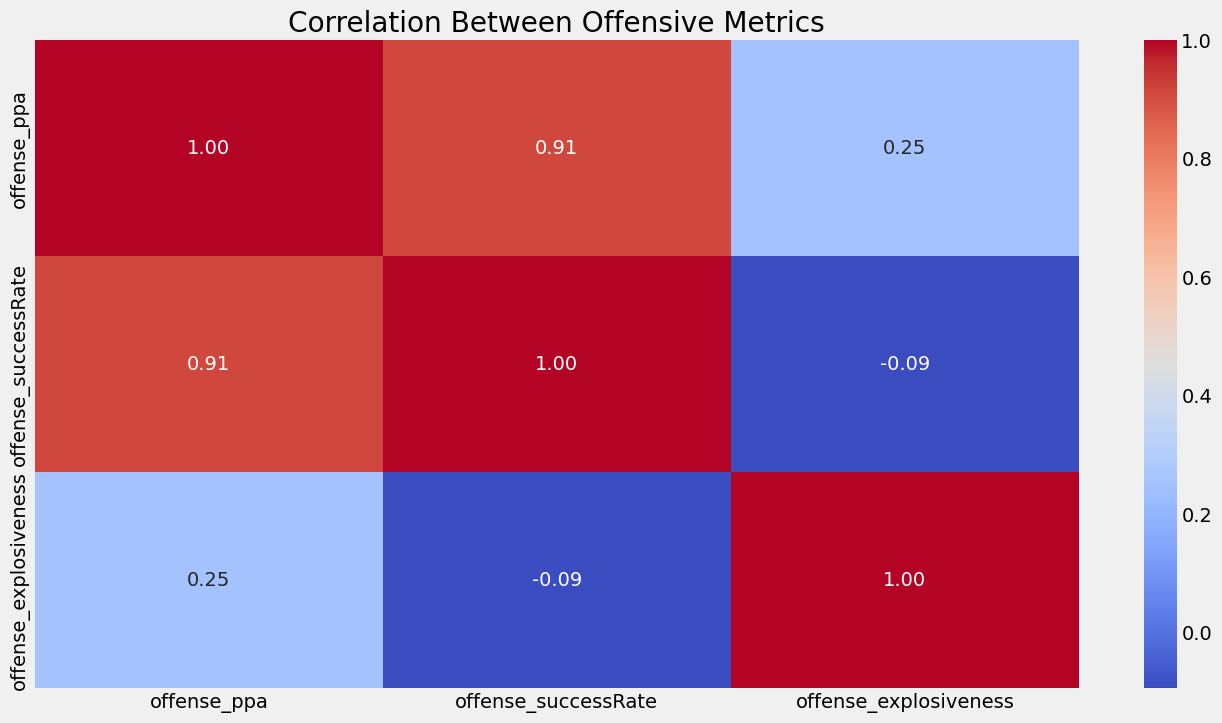

In [15]:
# 🧠 Let's look at correlations between key offensive metrics

off_metrics = teams[['offense_ppa', 'offense_successRate', 'offense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

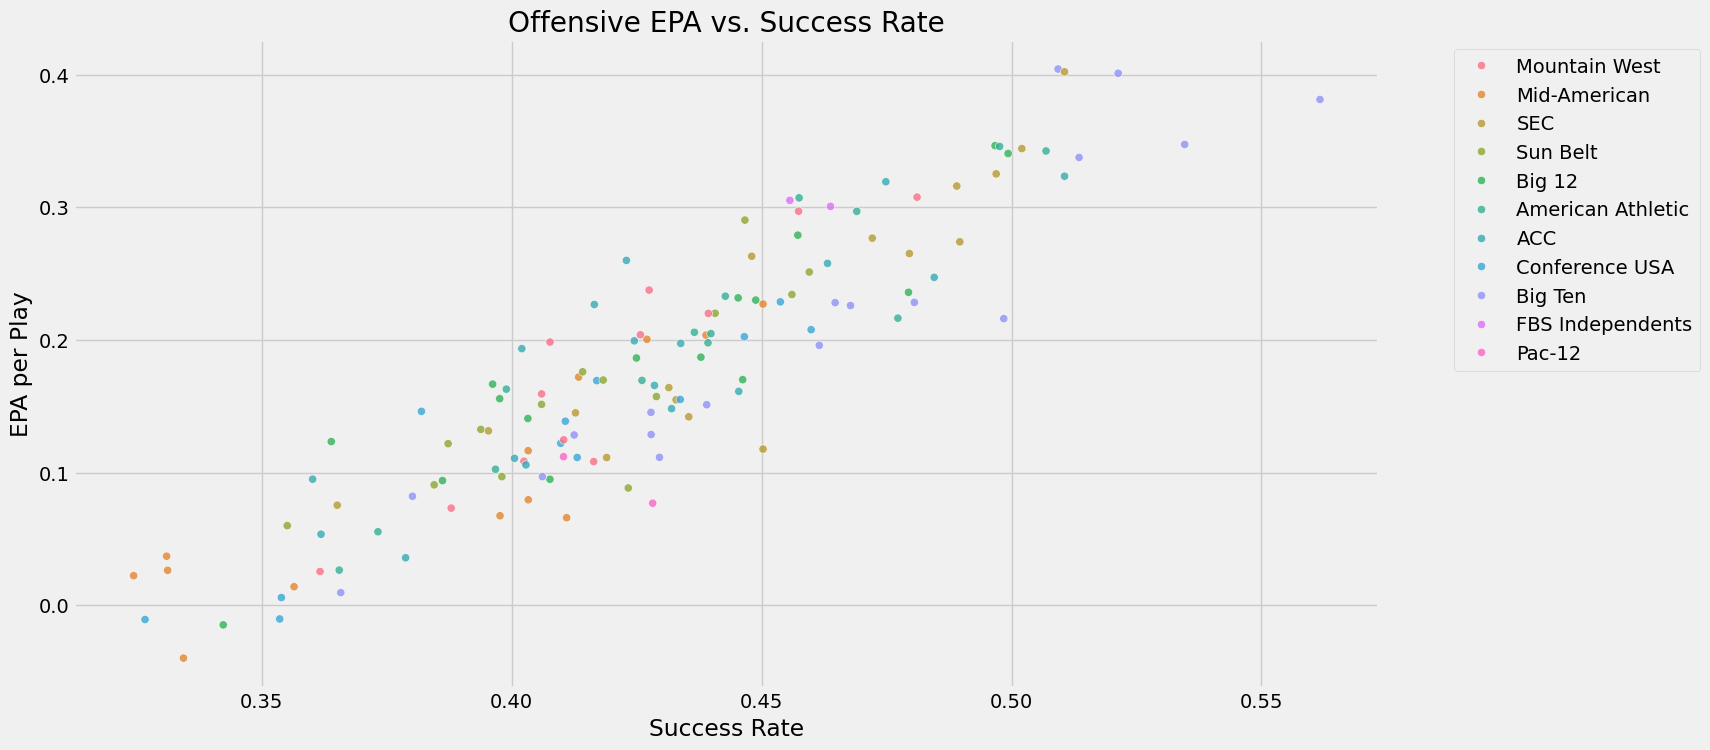

In [16]:
# 🔍 EPA vs. Success Rate (Offense)
sns.scatterplot(
    data=teams,
    x='offense_successRate',
    y='offense_ppa',
    hue='conference',
    alpha=0.8
)
plt.title("Offensive EPA vs. Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("EPA per Play")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [17]:
# 🎯 Highlight teams with high explosiveness but low success rate

threshold_explosive = teams['offense_explosiveness'].quantile(0.85)
threshold_success = teams['offense_successRate'].quantile(0.40)

boom_bust = teams[
    (teams['offense_explosiveness'] >= threshold_explosive) &
    (teams['offense_successRate'] <= threshold_success)
]

boom_bust[['team', 'conference', 'offense_ppa', 'offense_successRate', 'offense_explosiveness']]

,team,conference,offense_ppa,offense_successRate,offense_explosiveness
12,Boise State,Mountain West,0.198342,0.407670,1.344334
23,Colorado,Big 12,0.123353,0.363914,1.364653
30,Florida Atlantic,American Athletic,0.162862,0.398936,1.379943
47,Kansas State,Big 12,0.166625,0.396197,1.389857
49,Kent State,Mid-American,0.036959,0.330973,1.385234
68,Missouri State,Conference USA,0.146136,0.381955,1.460919
89,Pittsburgh,ACC,0.193393,0.402032,1.366472
115,UCF,Big 12,0.155668,0.397608,1.366913
118,UL Monroe,Sun Belt,0.059994,0.355109,1.391019
123,UTEP,Conference USA,-0.010761,0.326656,1.409520


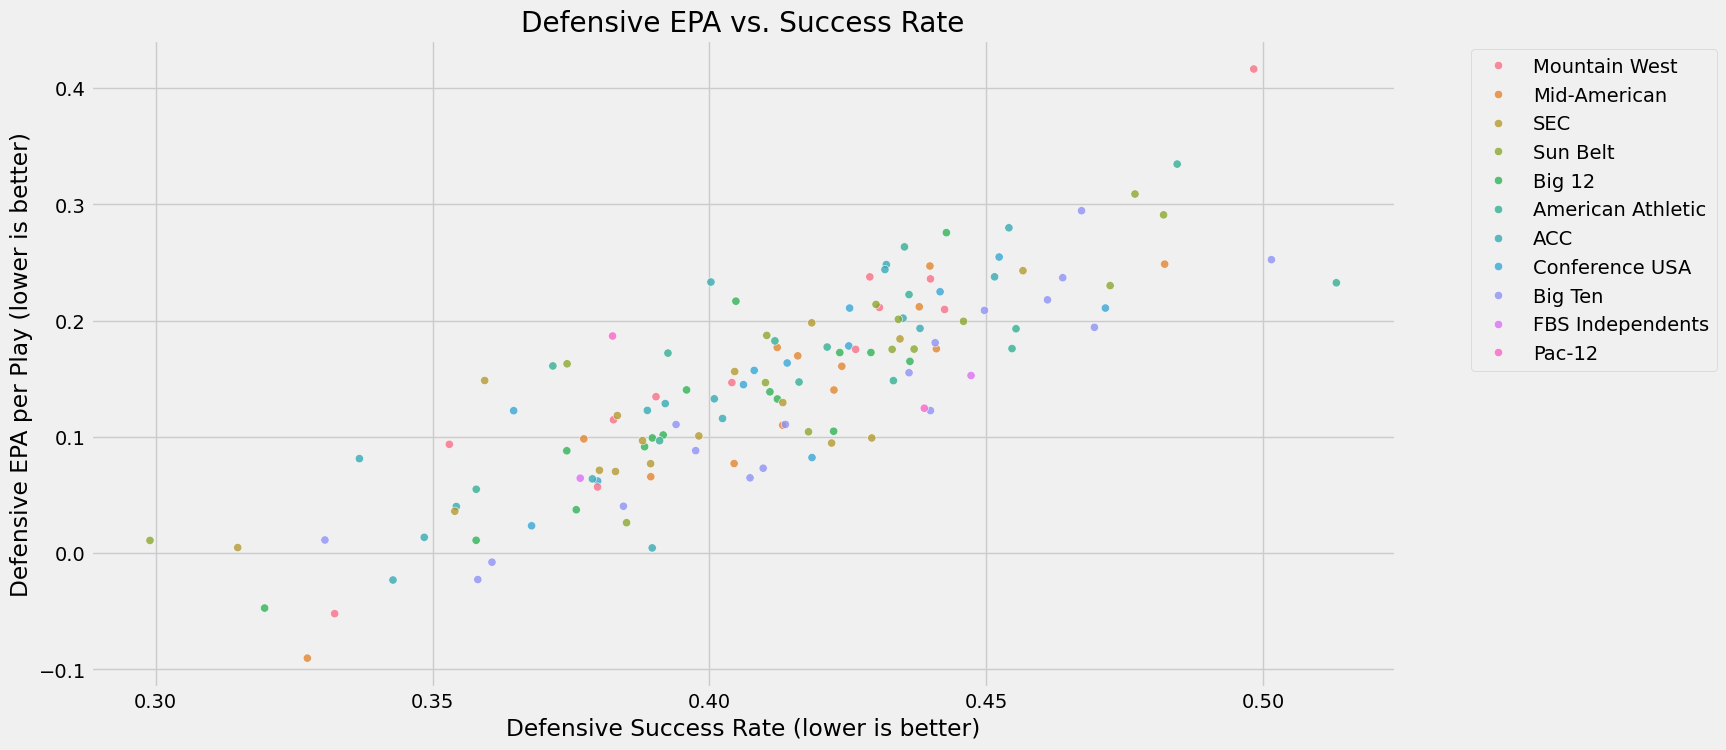

In [18]:
# 📊 Defensive profile: PPA vs. Success Rate

sns.scatterplot(
    data=teams,
    x='defense_successRate',
    y='defense_ppa',
    hue='conference',
    alpha=0.8
)
plt.title("Defensive EPA vs. Success Rate")
plt.xlabel("Defensive Success Rate (lower is better)")
plt.ylabel("Defensive EPA per Play (lower is better)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [19]:
# Let's repeat the process, adding some additional metrics

# Filter to FBS teams
teams = stats[stats['conference'].notnull()].copy()

# Drop rows with missing metric values
teams = teams.dropna(subset=[
    'offense_passingPlays_ppa', 'offense_rushingPlays_ppa', 'offense_havoc_frontSeven', 'offense_successRate', 'offense_explosiveness',
    'defense_passingPlays_ppa', 'defense_rushingPlays_ppa', 'defense_havoc_frontSeven', 'defense_successRate', 'defense_explosiveness'
])

print(f"{len(teams)} teams with complete data")

136 teams with complete data


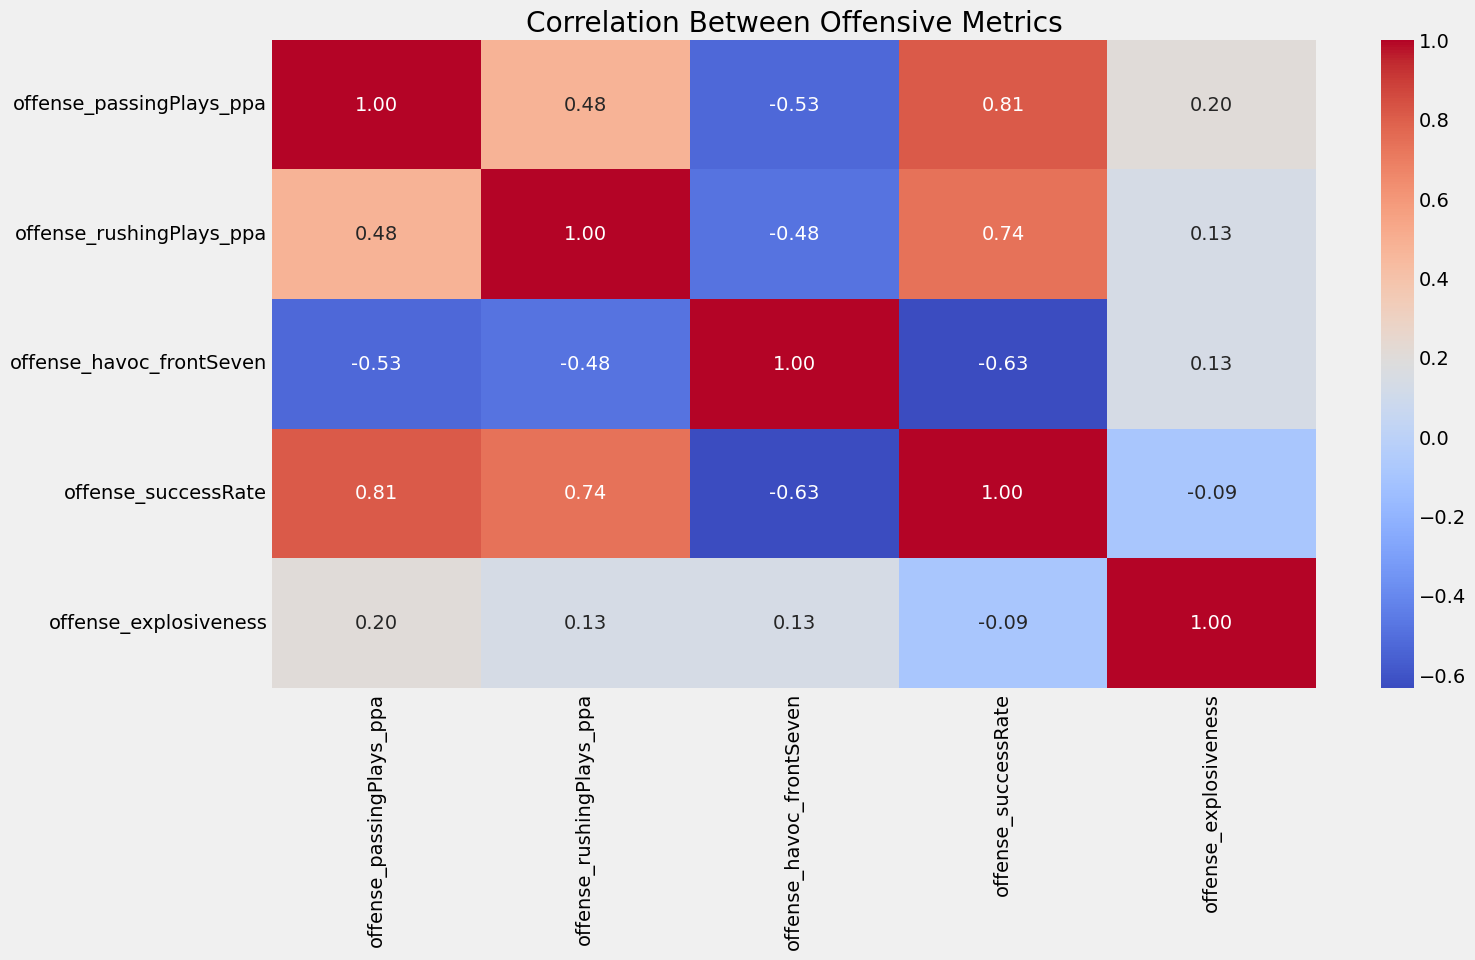

In [20]:
# Re-run the correlation analysis with new metrics

off_metrics = teams[[ 'offense_passingPlays_ppa', 'offense_rushingPlays_ppa', 'offense_havoc_frontSeven', 'offense_successRate', 'offense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

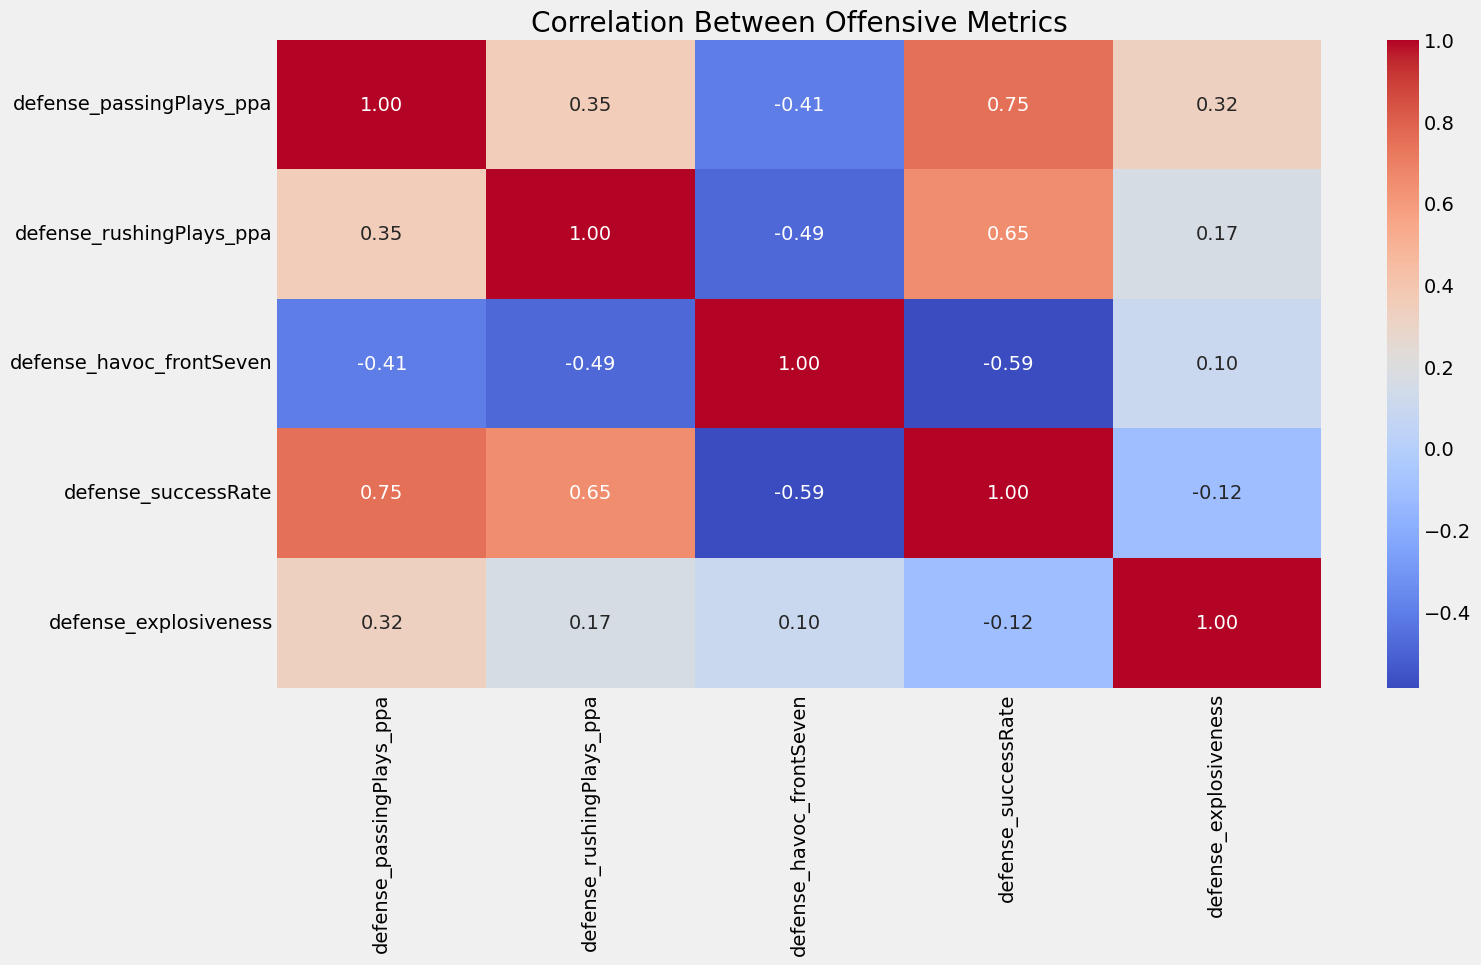

In [21]:
# Repeat again for defensive metrics

off_metrics = teams[['defense_passingPlays_ppa', 'defense_rushingPlays_ppa', 'defense_havoc_frontSeven', 'defense_successRate', 'defense_explosiveness']]
off_corr = off_metrics.corr()

sns.heatmap(off_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Offensive Metrics")
plt.show()

In [22]:
# ✅ Summary

# In this notebook, you:
# - Compared offensive and defensive metrics
# - Identified correlations and outliers
# - Found "boom-or-bust" style offenses
# - Visualized efficiency tradeoffs

# 🧪 Try This:
# - Build clusters of teams based on their profiles (KMeans, t-SNE)
# - Create matchup visualizations using opponent stats
# - Track metric evolution over time using weekly data (advanced_game_stats/)